# TP AFC :
REALISE PAR SOUSSANE KHALIL
# iid2 

In [123]:
import numpy as np
import pandas as pd
data=pd.read_excel("CSPfiliere.xlsx",index_col=0)
print(data)


           Droit  Sciences  Médecine  IUT
Exp.agri      80        99        65   58
Patron       168       137       208   62
Cadre.sup    470       400       876   79
Employé      145       133       135   54
Ouvrier      166       193       127  129


In [124]:
npdata = data.values
#print(npdata)
total_col = np.sum(npdata,axis=0)
total_ligne=np.sum(npdata,axis=1)
print('total_col :',total_col)
print('total_ligne:',total_ligne)



total_col : [1029  962 1411  382]
total_ligne: [ 302  575 1825  467  615]


In [125]:
prof_ligne=np.apply_along_axis(arr=npdata,axis=1,func1d=lambda x:x/np.sum(x))
print(prof_ligne)

[[0.26490066 0.32781457 0.21523179 0.19205298]
 [0.29217391 0.23826087 0.36173913 0.10782609]
 [0.25753425 0.21917808 0.48       0.04328767]
 [0.31049251 0.28479657 0.28907923 0.11563169]
 [0.2699187  0.31382114 0.20650407 0.2097561 ]]


representation graphique


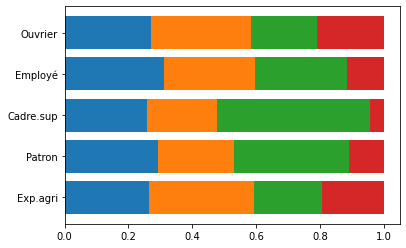

In [126]:
import matplotlib.pyplot as plt
l,c=prof_ligne.shape
somme=np.zeros(shape=l)
for i in range(c):
    plt.barh(range(l),prof_ligne[:,i],left=somme)
    somme+=prof_ligne[:,i]
plt.yticks(range(l),data.index)
plt.show()

In [127]:
prof_marg_ligne = total_col/np.sum(total_col)
print(prof_marg_ligne)

[0.27193446 0.25422833 0.37288584 0.10095137]


In [128]:
Dkhi2_cadre_ouvrier= np.sum((prof_ligne[2,:]-prof_ligne[4,:])**2/prof_marg_ligne)
print(Dkhi2_cadre_ouvrier) 

0.510900786777672


DISTANCE DU KHO-2 ENTRE CARDE ET PATRON

In [129]:
Dkhi2_cadre_patron= np.sum((prof_ligne[2,:]-prof_ligne[1,:])**2/prof_marg_ligne)
print(Dkhi2_cadre_patron)

0.08461088232967051


La distance entre paires de modalités lignes

In [130]:

distPairesLig = np.zeros(shape=(l,l))
for i in range(l-1):
  for j in range(i+1,l):
     distPairesLig[i,j] = np.sum((prof_ligne[i,:]-prof_ligne[j,:])**2/prof_marg_ligne)
 
pd = pd.DataFrame(distPairesLig,index=data.index,columns=data.index)
print(pd)


           Exp.agri    Patron  Cadre.sup   Employé   Ouvrier
Exp.agri        0.0  0.162117   0.453847  0.087400  0.004172
Patron          0.0  0.000000   0.084611  0.024514  0.191823
Cadre.sup       0.0  0.000000   0.000000  0.176847  0.510901
Employé         0.0  0.000000   0.000000  0.000000  0.115413
Ouvrier         0.0  0.000000   0.000000  0.000000  0.000000


heatmap

<AxesSubplot:>

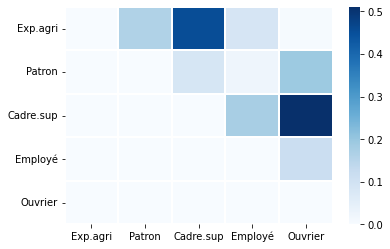

In [131]:
import seaborn as sns
sns.heatmap(distPairesLig,vmin=0,vmax=np.max(distPairesLig),linewidth=0.1,cmap='Blues',xticklabels=data.index,
yticklabels=data.index)


Distance a l'origine

In [132]:
import pandas as pd
distoLig = np.apply_along_axis(arr=prof_ligne,axis=1,func1d=lambda x:np.sum((x-prof_marg_ligne)**2/prof_marg_ligne))
print(distoLig)
dfp=pd.DataFrame(distoLig,data.index)
print(dfp)

[0.17034955 0.00331062 0.0693019  0.03011317 0.2054925 ]
                  0
Exp.agri   0.170350
Patron     0.003311
Cadre.sup  0.069302
Employé    0.030113
Ouvrier    0.205492


 poids des lignes

In [133]:
poids_ligne=total_ligne/np.sum(total_ligne)
print(poids_ligne)

[0.07980973 0.1519556  0.48229387 0.12341438 0.16252643]


inertie des lignes

In [134]:
intertie_ligne=distoLig*poids_ligne
print(intertie_ligne)

[0.01359555 0.00050307 0.03342388 0.0037164  0.03339796]


AFFICHAGE

In [138]:
print(pd.DataFrame(np.transpose([distoLig,poids_ligne,intertie_ligne]),columns=['Disto2','Poids','Inertie'] ,index=data.index))

             Disto2     Poids   Inertie
Exp.agri   0.170350  0.079810  0.013596
Patron     0.003311  0.151956  0.000503
Cadre.sup  0.069302  0.482294  0.033424
Employé    0.030113  0.123414  0.003716
Ouvrier    0.205492  0.162526  0.033398


totale inertie

In [139]:
tot_InertieLig = np.sum(intertie_ligne)
print(tot_InertieLig)

0.08463685828547157


AFC

In [144]:
from fanalysis.ca import CA
import scipy
afc = CA(row_labels=data.index,col_labels=data.columns)
afc.fit(data.values)

CA(col_labels=Index(['Droit', 'Sciences', 'Médecine', 'IUT'], dtype='object'),
   row_labels=Index(['Exp.agri', 'Patron', 'Cadre.sup', 'Employé', 'Ouvrier'], dtype='object'))

information restituée sur les facteurs

In [145]:
[print(x) for x in afc.eig_]
y = pd.DataFrame(afc.row_coord_,index=data.index)
print(y)

[0.0823936  0.00170345 0.00053981]
[97.34955225  2.01265584  0.63779191]
[ 97.34955225  99.36220809 100.        ]
                  0         1         2
Exp.agri   0.410115 -0.026253  0.038284
Patron     0.020151  0.026585 -0.046881
Cadre.sup -0.262717 -0.015596  0.006199
Employé    0.142090  0.097326  0.021242
Ouvrier    0.451481 -0.039588 -0.009493


affichage des valeurs propres

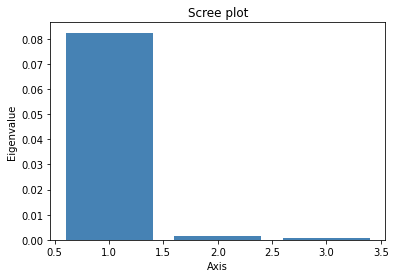

In [146]:
afc.plot_eigenvalues()

représentation des individus lignes dans le premier plan factoriel qui restitue 99.36% de l’information disponible.

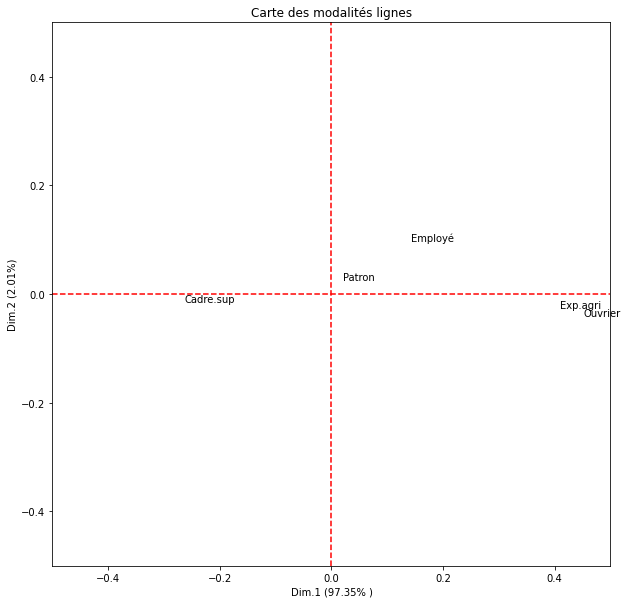

In [148]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='red',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='red',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes")
for i in range(data.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],data.index[i])

plt.show()

distance euclidienne de le 1er plan

In [149]:
distPairesLigF1 = np.zeros(shape=(prof_ligne.shape[0],prof_ligne.shape[0]))
for i in range(prof_ligne.shape[0]-1):
   for j in range(0,prof_ligne.shape[0]):
      distPairesLigF1[i,j] = np.sum((afc.row_coord_[i,0]-afc.row_coord_[j,0])**2)
y = pd.DataFrame(distPairesLigF1,index=data.index,columns=data.index)
print(y)

           Exp.agri    Patron  Cadre.sup   Employé   Ouvrier
Exp.agri   0.000000  0.152072   0.452704  0.071837  0.001711
Patron     0.152072  0.000000   0.080014  0.014869  0.186046
Cadre.sup  0.452704  0.080014   0.000000  0.163869  0.510079
Employé    0.071837  0.014869   0.163869  0.000000  0.095723
Ouvrier    0.000000  0.000000   0.000000  0.000000  0.000000


profile moyen des filieres

In [151]:
prof_marg_col = total_ligne/np.sum(total_ligne)
[print(x) for x in prof_marg_col]

0.07980972515856237
0.15195560253699789
0.4822938689217759
0.12341437632135306
0.1625264270613108


[None, None, None, None, None]

profile par filiere

In [152]:
prof_col = np.apply_along_axis(arr=data.values,axis=0,func1d=lambda x:x/np.sum(x))
print(pd.DataFrame(prof_col,index=data.index,columns=data.columns))

              Droit  Sciences  Médecine       IUT
Exp.agri   0.077745  0.102911  0.046067  0.151832
Patron     0.163265  0.142412  0.147413  0.162304
Cadre.sup  0.456754  0.415800  0.620836  0.206806
Employé    0.140914  0.138254  0.095677  0.141361
Ouvrier    0.161322  0.200624  0.090007  0.337696


distance a l'origine

In [153]:
distoCol = np.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:np.sum((x
-prof_marg_col)**2/prof_marg_col))
print(pd.DataFrame(distoCol,index=data.columns))

                 0
Droit     0.004738
Sciences  0.027168
Médecine  0.092792
IUT       0.414466


les poids des filieres

In [155]:
poidsCol = total_col/np.sum(total_col)
print(pd.DataFrame(poidsCol,index=data.columns))

                 0
Droit     0.271934
Sciences  0.254228
Médecine  0.372886
IUT       0.100951


In [156]:
inertieCol = distoCol*poidsCol
print(pd.DataFrame(inertieCol,index=data.columns))

                 0
Droit     0.001288
Sciences  0.006907
Médecine  0.034601
IUT       0.041841


In [157]:
print(np.sum(inertieCol))

0.08463685828547156


In [158]:
print(pd.DataFrame(afc.col_coord_,index=data.columns))

                 0         1         2
Droit     0.027987  0.060669 -0.016545
Sciences  0.160462  0.002734  0.037583
Médecine -0.303125 -0.029662 -0.005200
IUT       0.640174 -0.060749 -0.030870


representation graphique

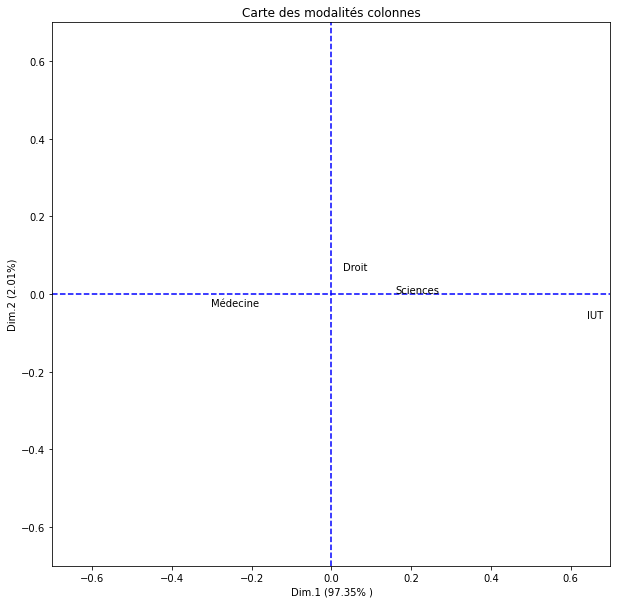

In [159]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='blue',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='blue',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités colonnes")
for i in range(data.shape[1]):
   ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],data.columns[i])
plt.show()

In [160]:
n = np.sum(npdata)
print(n)


3784


tableau sous independance

In [161]:
E = np.dot(np.reshape(total_ligne,(5,1)),np.reshape(total_col,(1,4)))/n
[print(x) for x in E]

[ 82.12420719  76.7769556  112.6115222   30.48731501]
[156.36231501 146.18128964 214.40935518  58.04704017]
[496.28039112 463.9667019  680.51664905 184.23625793]
[126.99339323 118.72463002 174.13768499  47.14429175]
[167.23969345 156.35042283 229.32478858  62.08509514]


[None, None, None, None, None]

KHI-2

In [162]:
KHI2 = np.sum(((npdata-E)**2)/E)
print(KHI2)

320.2658717522244


Degre de liberté

In [163]:
ddl = (E.shape[0]-1)*(E.shape[1]-1)
print(ddl)

12


In [164]:
print(1-scipy.stats.chi2.cdf(KHI2,ddl))

0.0


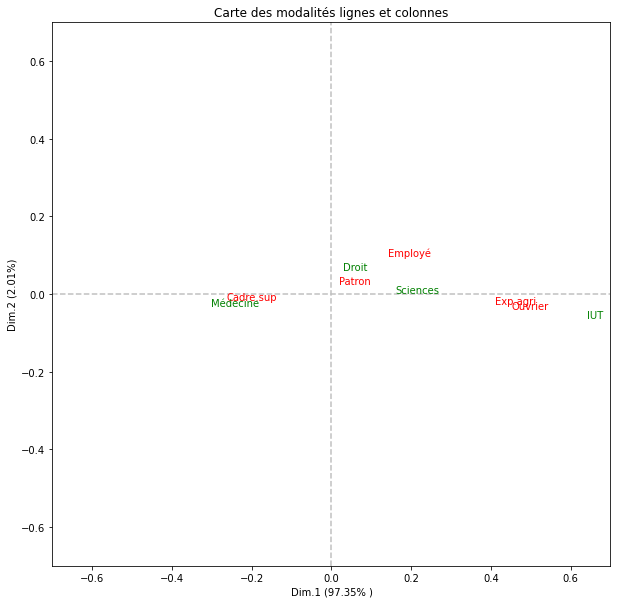

In [166]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes et colonnes")
for i in range(data.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],data.index[i],color='red')
for i in range(data.shape[1]):
 ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],data.columns[i],color='green')